<a href="https://colab.research.google.com/github/AnastasiaSperanskaya/MachineLearningITMO/blob/main/lab7/fashionmnistLab7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

На практике построим нейронную сеть для классификации картиной. В качестве входных данных используются картинки одежды (в градациях серого, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [ ]:
# !pip install torchvision

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torchvision

Скачаем обучающую и контрольную выборки.

In [ ]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=None)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=None)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
classes

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!





/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

<h2 style="text-align: center;"><b>Задание</b></h2>

Посмотрите на датасет.
* Сколько картинок в train? В test?
* Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем `train_data` у переменной `trainset`)? в test?
* Выведите несколько картинок с помощью `pyplot`

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1.  Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет
2. Свёрточную сеть, классифицирующую этот датасет
3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

In [ ]:
print("Images in train: ", len(trainset))
print("Images in test: ", len(testset))

Images in train:  60000
Images in test:  10000


In [ ]:
trainset.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
train_targets = trainset.targets 
a = np.array(train_targets)
df = pd.DataFrame(data = a)
df.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [ ]:
testset.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

In [ ]:
test_targets = testset.targets 
b = np.array(test_targets)
df = pd.DataFrame(data = b)
df.value_counts()

9    1000
8    1000
7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
1    1000
0    1000
dtype: int64

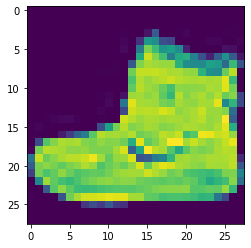

In [ ]:
plt.imshow(trainset.data[0])

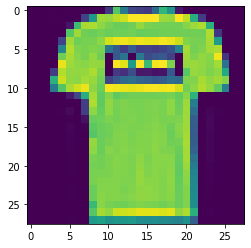

In [ ]:
plt.imshow(trainset.data[1])

In [ ]:
import torch
import torchvision
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [ ]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

In [ ]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=20,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=20,
                                         shuffle=False, num_workers=2)

In [ ]:
#Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 500)
        self.fc2 = torch.nn.Linear(500, 256)
        self.fc3 = torch.nn.Linear(256, 10)
        

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
MLP_network = MLP()
criterion = torch.nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(MLP_network.parameters(), lr=0.01)

num_epochs = 15
total_step = len(trainloader)
Loss_mlp = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = MLP_network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch [{}/{}] - Loss : {:.4f}'.format(epoch+1, num_epochs, running_loss / total_step))        
    Loss_mlp.append(running_loss / total_step)

Epoch [1/15] - Loss : 0.8766
Epoch [2/15] - Loss : 0.5097
Epoch [3/15] - Loss : 0.4511
Epoch [4/15] - Loss : 0.4166
Epoch [5/15] - Loss : 0.3930
Epoch [6/15] - Loss : 0.3731
Epoch [7/15] - Loss : 0.3568
Epoch [8/15] - Loss : 0.3432
Epoch [9/15] - Loss : 0.3315
Epoch [10/15] - Loss : 0.3198
Epoch [11/15] - Loss : 0.3104
Epoch [12/15] - Loss : 0.3010
Epoch [13/15] - Loss : 0.2932
Epoch [14/15] - Loss : 0.2850
Epoch [15/15] - Loss : 0.2782


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = MLP_network(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

In [ ]:
#Свёрточную сеть, классифицирующую этот датасет

In [ ]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels = 1, out_channels = 20, kernel_size = 5, stride = 1)
        self.pool = torch.nn.MaxPool2d(kernel_size=2)
        self.conv2 = torch.nn.Conv2d(20, 40, 5, 1)
        self.fc1 = torch.nn.Linear(4 * 4 * 40, 500)
        self.fc2 = torch.nn.Linear(500, 10)
        

    def forward(self, x):
        x = torch.nn.functional.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.nn.functional.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 4 * 4 * 40)
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
CNN_network = CNN()
criterion = torch.nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(CNN_network.parameters(), lr=0.01)

num_epochs = 15
total_step = len(trainloader)
Loss_cnn = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = CNN_network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch [{}/{}] - Loss : {:.4f}'.format(epoch+1, num_epochs, running_loss / total_step))          
    Loss_cnn.append(running_loss / total_step)

Epoch [1/15] - Loss : 0.8409
Epoch [2/15] - Loss : 0.5008
Epoch [3/15] - Loss : 0.4288
Epoch [4/15] - Loss : 0.3844
Epoch [5/15] - Loss : 0.3541
Epoch [6/15] - Loss : 0.3321
Epoch [7/15] - Loss : 0.3133
Epoch [8/15] - Loss : 0.2980
Epoch [9/15] - Loss : 0.2854
Epoch [10/15] - Loss : 0.2740
Epoch [11/15] - Loss : 0.2639
Epoch [12/15] - Loss : 0.2541
Epoch [13/15] - Loss : 0.2451
Epoch [14/15] - Loss : 0.2371
Epoch [15/15] - Loss : 0.2293


In [ ]:
class_correct_cnn = list(0. for i in range(10))
class_total_cnn = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = CNN_network(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct_cnn[label] += c[i].item()
            class_total_cnn[label] += 1

In [ ]:
#Сравните их качество (по графикам лосса и по Accuracy Score)

In [ ]:
print('MLP:')
print()
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
print()
print('CNN:')
print()
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct_cnn[i] / class_total_cnn[i]))

MLP:

Accuracy of T-shirt/top : 81 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 77 %
Accuracy of Dress : 90 %
Accuracy of  Coat : 72 %
Accuracy of Sandal : 94 %
Accuracy of Shirt : 74 %
Accuracy of Sneaker : 93 %
Accuracy of   Bag : 96 %
Accuracy of Ankle boot : 95 %

CNN:

Accuracy of T-shirt/top : 85 %
Accuracy of Trouser : 98 %
Accuracy of Pullover : 89 %
Accuracy of Dress : 91 %
Accuracy of  Coat : 78 %
Accuracy of Sandal : 95 %
Accuracy of Shirt : 67 %
Accuracy of Sneaker : 96 %
Accuracy of   Bag : 97 %
Accuracy of Ankle boot : 94 %


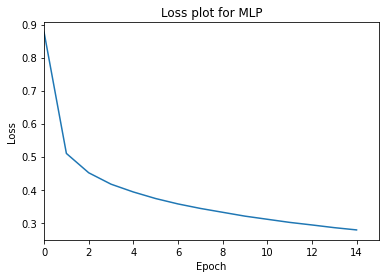

In [ ]:
plt.plot(Loss_mlp)
plt.title("Loss plot for MLP")
plt.xlim([0, num_epochs])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

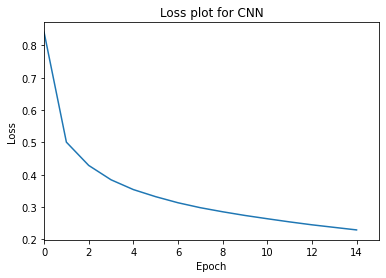

In [ ]:
plt.plot(Loss_cnn)
plt.title("Loss plot for CNN")
plt.xlim([0, num_epochs])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()